## 语谱图纵坐标反应的是真实声音频率，但mel谱图反应的是mel频率
## 为什么得到的声谱图纵坐标频率的值较大：根据采样率定的，纵坐标的值不超过采样率的一半

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import sys

def drawtime(data, name):
    """
    :param
        path	音频路径
        sr	采样率（默认22050，但是有重采样的功能）
        mono	设置为true是单通道，否则是双通道
        offset	音频读取的时间
        duration	获取音频的时长

    :returns
        y : 音频的信号值，类型是ndarray
        sr : 采样率
    """
    ###############################################################################

    ###############################################################################
    # plt画图
    f, ((ax11, ax12)) = plt.subplots(2, 1, sharex=False, sharey=False)
    ###################################################################
    # 01 左，信号
    ax11.set_title(name + ' Signal')
    ax11.set_xlabel('Time (samples)')
    ax11.set_ylabel('Amplitude')
    ax11.plot(data)
    # plt.xticks([])
    # plt.yticks([])
    plt.tight_layout()
    ###################################################################
    # 02 右，傅里叶变换
    n_fft = 2048
    ft = np.abs(librosa.stft(data[:n_fft], hop_length=n_fft+1))
    ax12.set_title(name + ' Spectrum')
    ax12.set_xlabel('Frequency Bin')
    ax12.set_ylabel('Amplitude')
    ax12.plot(ft)
    ################################################################################
    # plt.xticks([])
    # plt.yticks([])
    plt.tight_layout()
    
    plt.show()

def drawspec(data, fs, name):
    L = len(data)
    print('Time:', L / fs)


    #0.025s
    framelength = 0.025
    #NFFT点数=0.025*fs
    framesize = int(framelength * fs)
    print("NFFT:", framesize)

    #画语谱图
    plt.specgram(data, NFFT=framesize, Fs=fs, window=np.hanning(M=framesize))
    # plt.xticks([])
    # plt.yticks([])
    # plt.ylabel('Frequency')
    # plt.xlabel('Time(s)')
    plt.title(name + '-Spectrogram')
    plt.show()

def drawmelspec(data, fs, name):
    L = len(data)
    print('Time:', L / fs)

    # 0.025s
    framelength = 0.025
    # NFFT点数=0.025*fs
    framesize = int(framelength * fs)
    print("NFFT:", framesize)

    #提取mel特征
    mel_spect = librosa.feature.melspectrogram(y=data, sr=fs, n_fft=framesize)
    #转化为log形式
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)

    #画mel谱图
    librosa.display.specshow(mel_spect, sr=fs)
    # librosa.display.specshow(mel_spect, sr=fs, x_axis='time', y_axis='mel')

    plt.xticks([])
    plt.yticks([])
    # plt.ylabel('Mel Frequency')
    # plt.xlabel('Time(s)')
    plt.title(name + ' Mel Spectrogram')
    plt.show()

In [92]:
import librosa
path_clean = "/Users/yuexiajiao/Desktop/validation/sample1-male/1_clean.wav"
path_infer_better = "/Users/yuexiajiao/Desktop/validation/sample1-male/1_infer_better.wav"
path_infer_RNN = "/Users/yuexiajiao/Desktop/validation/sample1-male/1_infer_RNN.wav"
path_noisy = "/Users/yuexiajiao/Desktop/validation/sample1-male/1_noisy.wav"
# sr=None声音保持原采样频率， mono=False声音保持原通道数
data_noisy, fs4 = librosa.load(path_noisy, sr=None, mono=False) 
data_clean, fs1 = librosa.load(path_clean, sr=None, mono=False) 
data_infer_better, fs2 = librosa.load(path_infer_better, sr=None, mono=False) 
data_infer_RNN, fs3 = librosa.load(path_infer_RNN, sr=None, mono=False) 

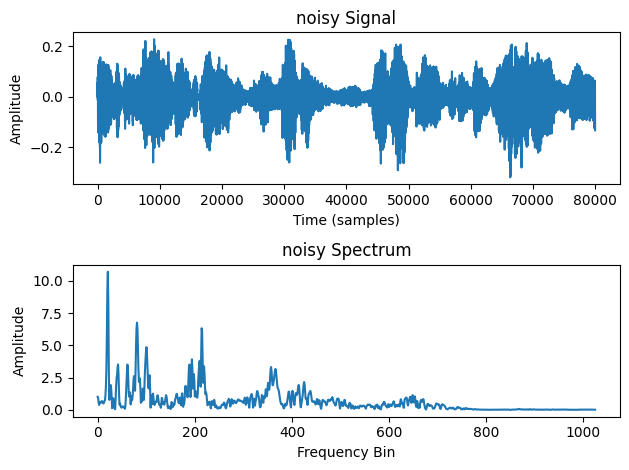

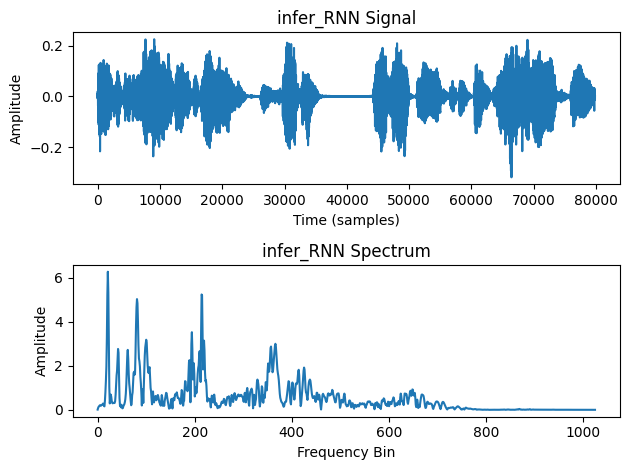

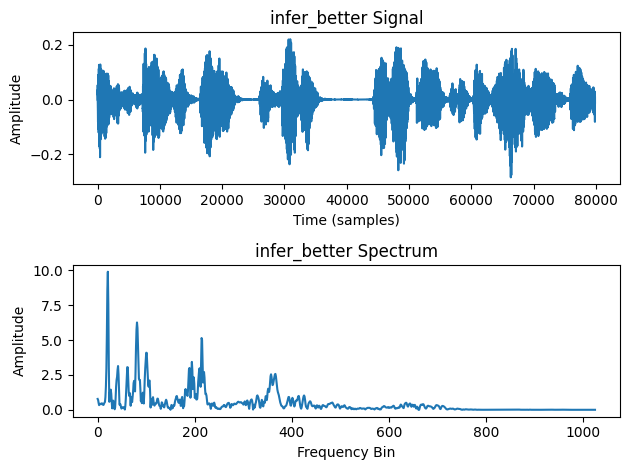

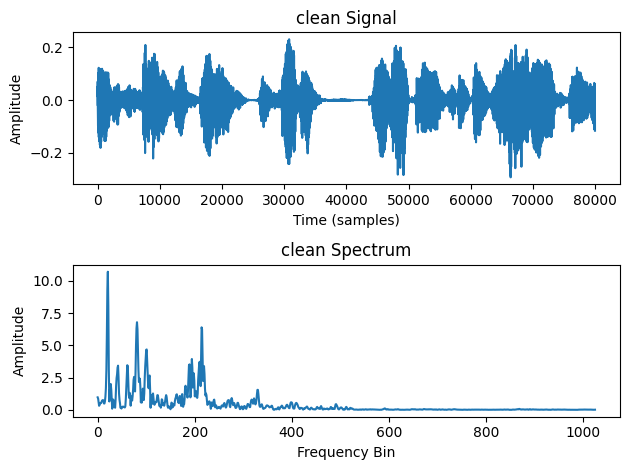

In [93]:
drawtime(data_noisy, "noisy")
drawtime(data_infer_RNN, "infer_RNN")
drawtime(data_infer_better, "infer_better")
drawtime(data_clean, "clean")

Time: 5.0
NFFT: 400


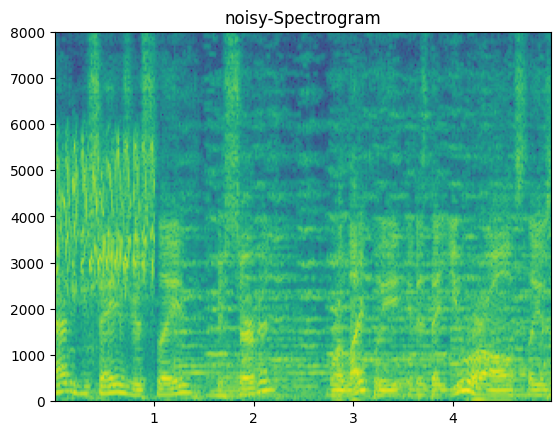

Time: 4.99
NFFT: 400


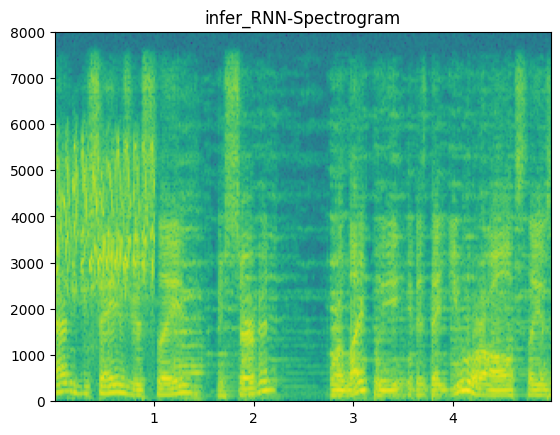

Time: 4.992
NFFT: 400


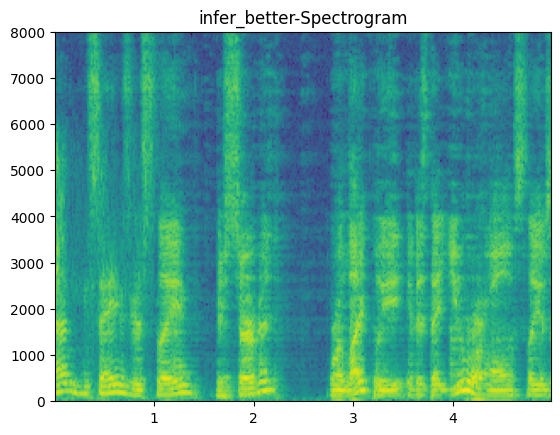

Time: 5.0
NFFT: 400


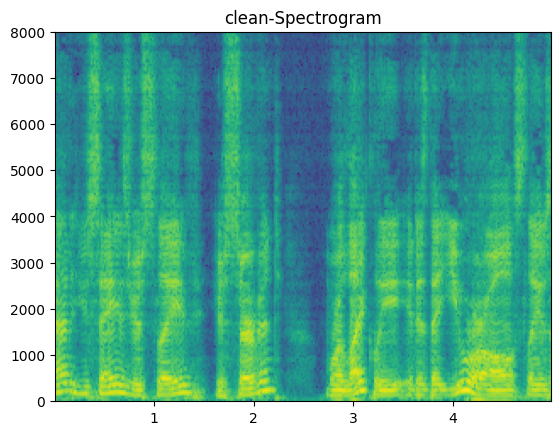

In [94]:
drawspec(data_noisy, fs4, "noisy")
drawspec(data_infer_RNN, fs3, "infer_RNN")
drawspec(data_infer_better, fs2, "infer_better")
drawspec(data_clean, fs1, "clean")

Time: 5.0
NFFT: 400


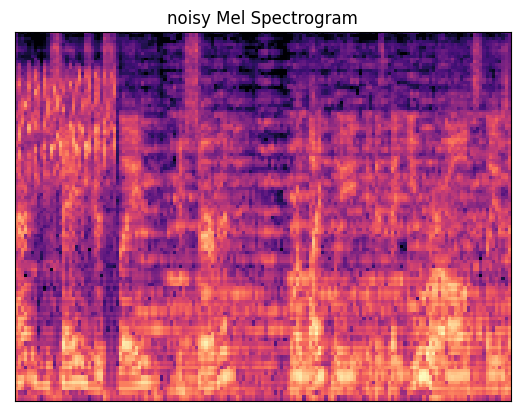

Time: 4.99
NFFT: 400


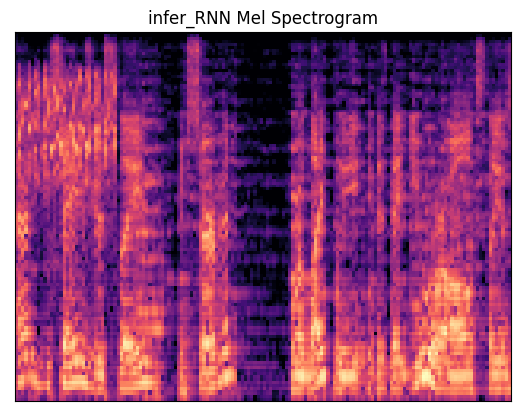

Time: 4.992
NFFT: 400


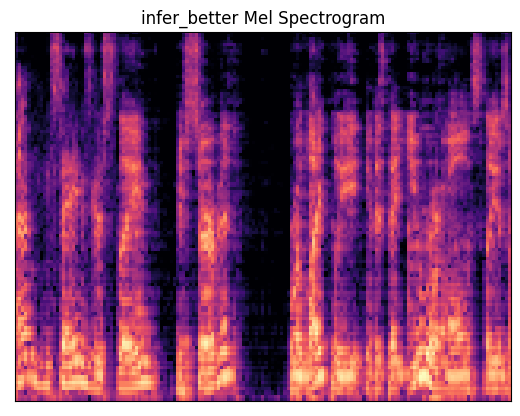

Time: 5.0
NFFT: 400


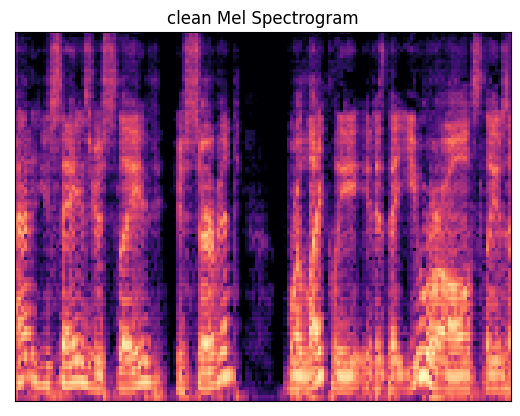

In [95]:
drawmelspec(data_noisy, fs4, "noisy")
drawmelspec(data_infer_RNN, fs3, "infer_RNN")
drawmelspec(data_infer_better, fs2, "infer_better")
drawmelspec(data_clean, fs1, "clean")